In [1]:
import numpy as np
import hoomd
import itertools
import gsd.hoomd
import math

def lj_system(n, spacing, box_factor=3):
    """
    Initating a system with one type of particle (A)
    """
    N_particles = n
    spacing = spacing
    K = math.ceil(N_particles**(1 / 3))
    L = K * spacing
    x = np.linspace(-L / 2, L / 2, K, endpoint=False)
    position = list(itertools.product(x, repeat=3))

    snapshot = gsd.hoomd.Frame()
    snapshot.particles.N = N_particles
    snapshot.particles.position = position[0:N_particles]
    snapshot.particles.typeid = [0] * N_particles
    snapshot.configuration.box = [L*box_factor, L*box_factor, L*box_factor, 0, 0, 0]
    snapshot.particles.types = ['A']
    return snapshot


def pair_force(sigma=1, epsilon=1):
    """
    Creates non-bonded forces between A particles.
    """
    cell = hoomd.md.nlist.Cell(buffer=0.4)
    lj = hoomd.md.pair.LJ(nlist=cell)
    lj.params[('A', 'A')] = dict(epsilon=epsilon, sigma=sigma)
    lj.r_cut[('A', 'A')] = 2.5 * sigma
    return lj

In [2]:
init_snap = lj_system(n=2, spacing=1.5, box_factor=2)
with gsd.hoomd.open(name='init.gsd', mode='w') as f:
    f.append(init_snap)

In [69]:
from flowermd.base import Simulation
forces = [pair_force(sigma=1, epsilon=1)]
sim = Simulation(initial_state=init_snap, forcefield=forces, dt=0.0001, gsd_write_freq=1000, log_write_freq=1000)

Initializing simulation state from a gsd.hoomd.Frame.


In [70]:
gsd_logger = hoomd.logging.Logger(
    categories=["scalar", "string", "sequence", "particle"]
)
gsd_logger.add(sim, quantities=["timestep", "tps"])


gsd_logger.add(sim.operations.computes[0], quantities=sim.log_quantities)

for f in sim._forcefield:
    gsd_logger.add(f, quantities=["energy", "forces"])

gsd_writer = hoomd.write.GSD(
    filename=sim.gsd_file_name,
    trigger=hoomd.trigger.Periodic(int(sim.gsd_write_freq)),
    mode="wb",
    dynamic=["momentum", "property"],
    filter=hoomd.filter.All(),
    logger=gsd_logger,
)
gsd_writer.maximum_write_buffer_size = sim.maximum_write_buffer_size
sim.operations.writers[0] = gsd_writer



In [71]:
sim.run_NVT(n_steps=1e6, kT=1.5, tau_kt=0.1, write_at_start=True)
sim.run_NVT(n_steps=1e6, kT=3.0, tau_kt=0.1, write_at_start=True)
sim.run_NVT(n_steps=1e6, kT=5.0, tau_kt=0.1, write_at_start=True)

Step 1000 of 1000000; TPS: 5689.93; ETA: 2.9 minutes
Step 2000 of 1000000; TPS: 11312.79; ETA: 1.5 minutes
Step 3000 of 1000000; TPS: 16891.04; ETA: 1.0 minutes
Step 4000 of 1000000; TPS: 22422.4; ETA: 0.7 minutes
Step 5000 of 1000000; TPS: 27906.61; ETA: 0.6 minutes
Step 6000 of 1000000; TPS: 33335.0; ETA: 0.5 minutes
Step 7000 of 1000000; TPS: 38718.31; ETA: 0.4 minutes
Step 8000 of 1000000; TPS: 44057.47; ETA: 0.4 minutes
Step 9000 of 1000000; TPS: 49353.47; ETA: 0.3 minutes
Step 10000 of 1000000; TPS: 54602.74; ETA: 0.3 minutes
Step 11000 of 1000000; TPS: 59808.94; ETA: 0.3 minutes
Step 12000 of 1000000; TPS: 64972.68; ETA: 0.3 minutes
Step 13000 of 1000000; TPS: 70092.95; ETA: 0.2 minutes
Step 14000 of 1000000; TPS: 75175.05; ETA: 0.2 minutes
Step 15000 of 1000000; TPS: 80218.19; ETA: 0.2 minutes
Step 16000 of 1000000; TPS: 85196.11; ETA: 0.2 minutes
Step 17000 of 1000000; TPS: 90143.59; ETA: 0.2 minutes
Step 18000 of 1000000; TPS: 95057.54; ETA: 0.2 minutes
Step 19000 of 1000000;

/home/marjan/anaconda3/envs/anisoML/lib/python3.11/site-packages/flowermd/utils/actions.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  eta = np.round((self.n_steps - current_step) / (60 * tps), 1)
/home/marjan/anaconda3/envs/anisoML/lib/python3.11/site-packages/flowermd/utils/actions.py:22: RuntimeWarning: invalid value encountered in scalar floor_divide
  eta_hour = eta // 60
/home/marjan/anaconda3/envs/anisoML/lib/python3.11/site-packages/flowermd/utils/actions.py:23: RuntimeWarning: invalid value encountered in scalar remainder
  eta_min = np.round(eta % 60, 0)


Step 8000 of 1000000; TPS: 1183957.38; ETA: 0.0 minutes
Step 9000 of 1000000; TPS: 1190791.21; ETA: 0.0 minutes
Step 10000 of 1000000; TPS: 1199040.77; ETA: 0.0 minutes
Step 11000 of 1000000; TPS: 1208260.11; ETA: 0.0 minutes
Step 12000 of 1000000; TPS: 1195219.12; ETA: 0.0 minutes
Step 13000 of 1000000; TPS: 1197935.86; ETA: 0.0 minutes
Step 14000 of 1000000; TPS: 1203679.82; ETA: 0.0 minutes
Step 15000 of 1000000; TPS: 1209384.83; ETA: 0.0 minutes
Step 16000 of 1000000; TPS: 1211111.95; ETA: 0.0 minutes
Step 17000 of 1000000; TPS: 1214893.16; ETA: 0.0 minutes
Step 18000 of 1000000; TPS: 1219099.22; ETA: 0.0 minutes
Step 19000 of 1000000; TPS: 1222022.13; ETA: 0.0 minutes
Step 20000 of 1000000; TPS: 1225640.4; ETA: 0.0 minutes
Step 21000 of 1000000; TPS: 1229364.24; ETA: 0.0 minutes
Step 22000 of 1000000; TPS: 1233252.99; ETA: 0.0 minutes
Step 23000 of 1000000; TPS: 1237091.22; ETA: 0.0 minutes
Step 24000 of 1000000; TPS: 1235712.08; ETA: 0.0 minutes
Step 25000 of 1000000; TPS: 123835

In [72]:
sim.flush_writers()

In [73]:
import freud

traj = gsd.hoomd.open("trajectory.gsd")
energy = []
distances = []
dr = []
forces = []
for frame in traj:
    L = frame.configuration.box[0]
    box = freud.Box.cube(L)
    distance = box.compute_all_distances(frame.particles.position[0], frame.particles.position[1])[0]
    if distance < 2.5:
        distances.append(distance)
        dr.append(box.wrap(frame.particles.position[0] - frame.particles.position[1]))
        energy.append(frame.log['md/pair/LJ/energy'])
        forces.append(frame.log['particles/md/pair/LJ/forces'])

In [74]:
len(energy)

792

/home/marjan/anaconda3/envs/anisoML/lib/python3.11/site-packages/matplotlib/cbook.py:1699: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)
/home/marjan/anaconda3/envs/anisoML/lib/python3.11/site-packages/matplotlib/cbook.py:1699: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.isfinite(val)
/home/marjan/anaconda3/envs/anisoML/lib/python3.11/site-packages/matplotlib/cbook.py:1699: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return

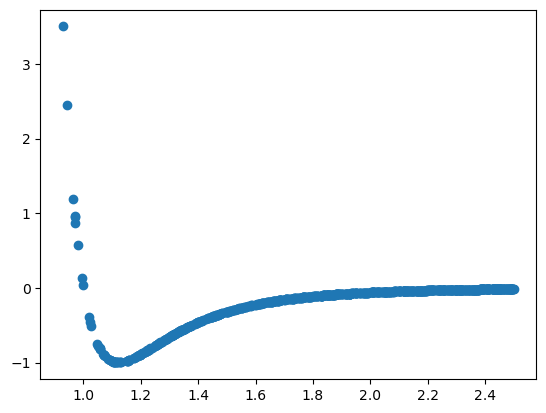

In [75]:
import matplotlib.pyplot as plt
plt.scatter(distances, energy)

In [76]:
np.max(np.asarray(forces))

61.81276277628233

In [83]:
import pandas as pd
columns = [
    "dr",
    "energy",
    "force",
]
new_traj_df = pd.DataFrame(columns=columns)
new_traj_df["dr"] = dr
new_traj_df["energy"] = energy
new_traj_df["force"] = forces

In [84]:
new_traj_df = new_traj_df.sample(frac=1).reset_index(drop=True)# shuffle dataset

In [85]:
import os
target_datapath="/home/marjan/Documents/code-base/ml_datasets/isotropic_pair/"

new_traj_df.to_pickle(os.path.join(target_datapath, "raw.pkl"))
test_frac = 0.1
val_frac = 0.1

dataset_len = new_traj_df.shape[0]
test_len = int(dataset_len * test_frac)
val_len = int(dataset_len * val_frac)

test_df = new_traj_df.iloc[:test_len]

val_df = new_traj_df.iloc[test_len: test_len + val_len]

train_df = new_traj_df.iloc[test_len + val_len:]

In [86]:
train_df.to_pickle(os.path.join(target_datapath, 'train.pkl'))
val_df.to_pickle(os.path.join(target_datapath, 'val.pkl'))
test_df.to_pickle(os.path.join(target_datapath, 'test.pkl'))

In [89]:
norms = np.linalg.norm(np.asarray(dr), axis=1)

In [100]:
np.all(np.isclose(norms, np.asarray(distances).squeeze()))

True

In [95]:
np.where(norms != np.asarray(distances).squeeze())

(array([  1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  14,  15,  17,
         18,  19,  20,  21,  22,  23,  24,  25,  28,  30,  31,  32,  33,
         34,  35,  36,  37,  38,  40,  41,  42,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  76,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 100, 102, 103, 104, 105, 106, 107,
        110, 111, 112, 115, 116, 118, 119, 121, 122, 123, 124, 126, 127,
        129, 130, 132, 133, 134, 137, 138, 139, 141, 142, 146, 147, 148,
        150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163,
        165, 167, 168, 169, 170, 171, 172, 173, 174, 176, 178, 179, 182,
        183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
        197, 198, 199, 200, 202, 203, 204, 206, 207, 209, 211, 214, 215,
        217, 218, 219, 220, 221, 222, 223, 224, 226

In [101]:
norms[309]

2.0511901

In [102]:
distances[309]

array([2.0511897], dtype=float32)